In [3]:
import os
import autogis

In [4]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from IPython.display import Image

In [5]:
# load the geocordinates of the study areas
areas = autogis.GeoPoint(file='data/study_areas.csv')
geodata = areas.geodata
graphs = [f"data/{'_'.join(n.split(' '))}.graphml" for n in geodata.place]
geodata

,city,place,y,x,geometry
0,Accra,Airport Residential Area,5.606246,-0.185884,POINT (-0.18588 5.60625)
1,Accra,Darkuman,5.590274,-0.250425,POINT (-0.25043 5.59027)
2,Accra,Nungua Central,5.610361,-0.086168,POINT (-0.08617 5.61036)
3,Kumasi,Adum,6.691810,-1.628995,POINT (-1.62900 6.69181)
4,Kumasi,Tafo,6.739872,-1.604349,POINT (-1.60435 6.73987)
5,Kumasi,Atonsu,6.655469,-1.608824,POINT (-1.60882 6.65547)



#### closeness centrality plot for each study area

In [ ]:
for name, city, place in zip(graphs, geodata.city, geodata.place):
    fig, ax = autogis.visualize_edge_cc(ox.load_graphml(name))
    #ax.patch.set_edgecolor('black')
    #ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_edge_cc.png"
    fig.savefig(img_name)

#### plot graph (black graph on white background)

In [ ]:
for name, city, place in zip(graphs, geodata.city, geodata.place):
    fig, ax = autogis.black_bg_plot(ox.load_graphml(name))
    ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_bw.png"
    fig.savefig(img_name)

#### visualize street network with anotatted street names

In [ ]:
for name, city, place in zip(graphs, geodata.city, geodata.place):
    G = ox.load_graphml(name)
    fig, ax = autogis.black_bg_plot(ox.load_graphml(name))
    for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna("").iterrows():
        text = edge["name"]
        c = edge["geometry"].centroid
        ax.annotate(text, (c.x, c.y), c="y")
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_street_names.png"
    fig.savefig(img_name)
    plt.show()
    break

#### betweenness centrality (nodes) of each study area

In [ ]:
for name, city, place in zip(graphs, geodata.city, geodata.place):
    fig, ax = autogis.visualize_node_bc(ox.load_graphml(name))
    #ax.patch.set_edgecolor('black')
    #ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_node_bc.png"
    fig.savefig(img_name)

#### betweenness centrality (edges)

In [ ]:
for name, city, place in zip(graphs, geodata.city, geodata.place):
    fig, ax = autogis.visualize_edge_bc(ox.load_graphml(name))
    #ax.patch.set_edgecolor('black')
    #ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_edge_bc.png"
    fig.savefig(img_name)

#### visualize building footprints

In [ ]:
for name, city, place in zip(graphs, geodata.city, geodata.place):
    fig, ax = autogis.visualize_street_footprint(os.path.splitext(name)[0])
    #ax.patch.set_edgecolor('black')
    #ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_building_footprint.png"
    fig.savefig(img_name)
    break

In [ ]:
import networkx as nx
import osmnx as ox

In [8]:
def visualize_node_pr(G: nx.MultiDiGraph, **kwargs):
    """calculate and plot betweeness centrality of nodes on the directed graph
    of the downloaded multigraph 

    Args:
        G (nx.MultiDiGraph): street network downloaded and constructed by osmnx
    
    Returns:
        fig, ax: matplotib figure and axes objects
    """
    bc = nx.pagerank(ox.get_digraph(G), weight='length')
    nx.set_node_attributes(G, bc, 'pr')
    nc = ox.plot.get_node_colors_by_attr(G, 'pr', cmap='inferno')
    return ox.plot_graph(
        G,
        figsize=(10, 10),
        bgcolor='white',
        node_color=nc,
        node_size=50,
        node_zorder=2,
        edge_color='black',
        edge_linewidth=0.3,
        show=False,
        **kwargs)

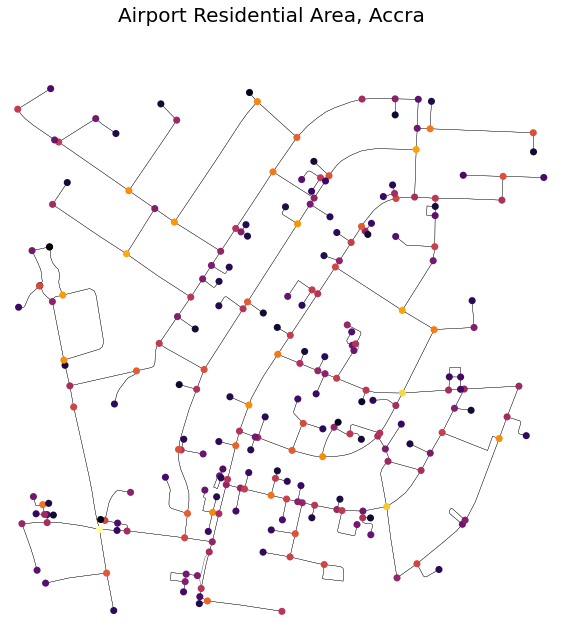

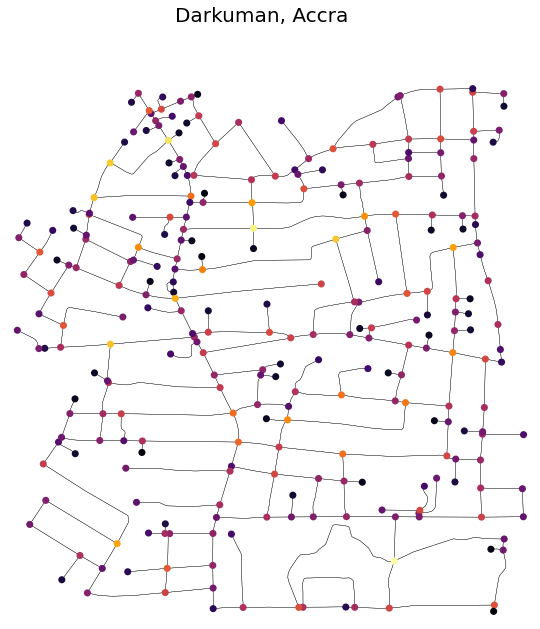

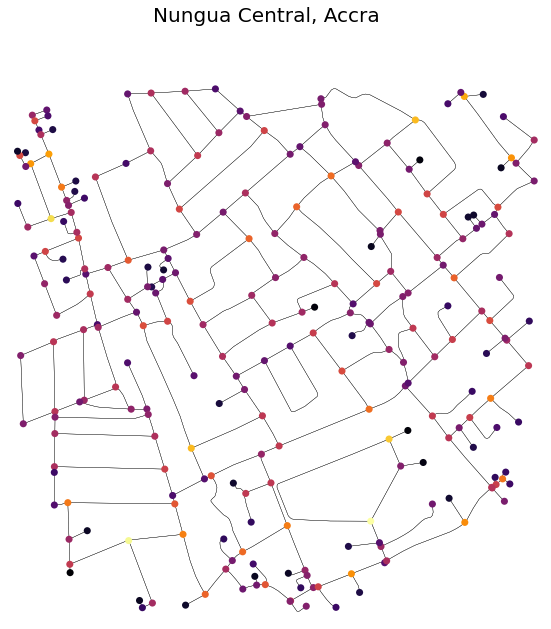

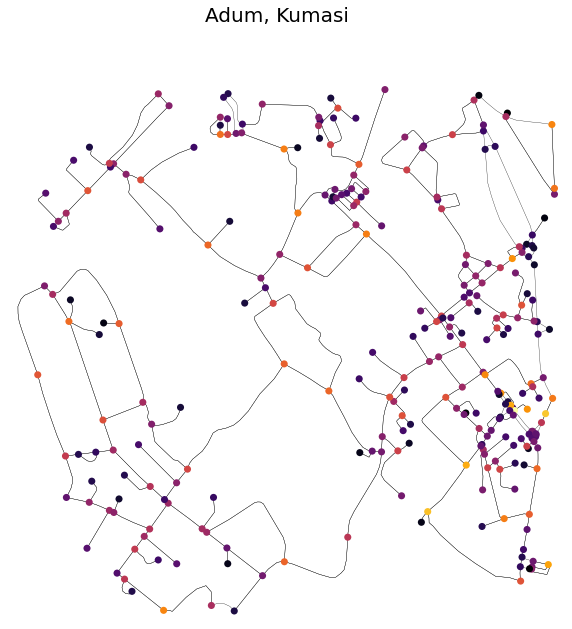

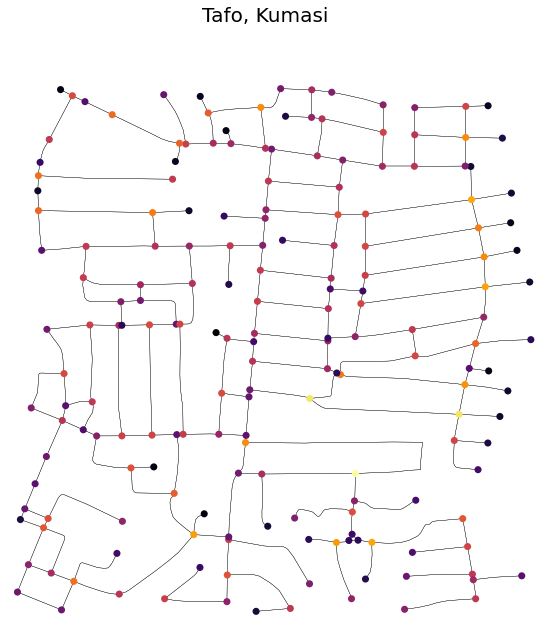

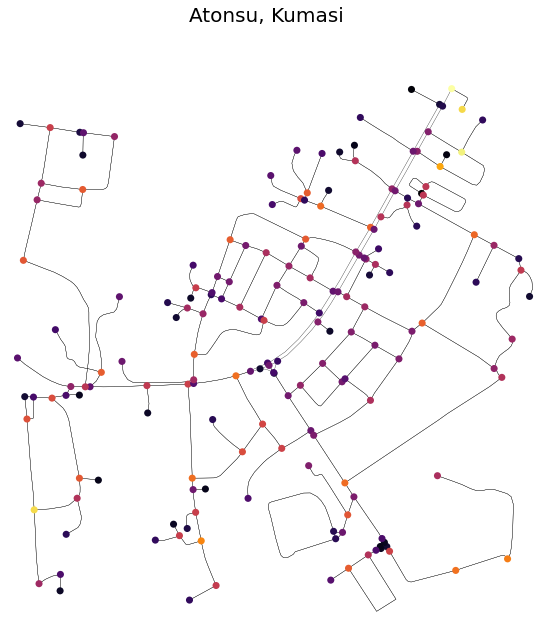

In [10]:
for name, city, place in zip(graphs, geodata.city, geodata.place):
    fig, ax = visualize_node_pr(ox.load_graphml(name))
    #ax.patch.set_edgecolor('black')
    #ax.patch.set_linewidth('1')
    fig.suptitle(f"{place}, {city}", fontsize=20)
    img_name = f"images/{city}_{'_'.join(place.split(' '))}_pagerank.png"
    fig.savefig(img_name)